<a href="https://colab.research.google.com/github/jorgeerrz/RL_book_club/blob/main/Chapter2_Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [75]:
def greedy_policy(q,*args,**hparams):
  a = 0
  arms = np.array(range(0,hparams["n_arms"]))
  if np.random.rand() < hparams["ϵ"]:
      a = np.random.choice(arms)
  else:
      a = np.argmax(q) 
  return a

In [92]:
def UCB_policy(q,*args,**hparams):
  t, N_t = args
  arms = np.array(range(0,hparams["n_arms"]))
  if all(N_t) > 0:
    a = np.argmax(q + hparams["c"]*np.sqrt(np.log(t)/N_t))
  else:
    a = np.random.choice(arms[np.where(N_t == 0)])
  return a

In [74]:
def bandit(Q_init,policy,n_episodes, **hparams):
  n_arms = hparams["n_arms"]
  #Initialize Q values
  Q = np.ones(n_arms)*Q_init
  #Initialize the number of visits
  N = np.zeros(n_arms)
  #Initialize mean of rewards for each arm
  rewards = np.random.normal(0.0,1.0,n_arms)
  best_arm = np.argmax(rewards)
  #To compute the percentage of times the algo
  #chose best arm
  n_bests = np.zeros(n_episodes)
  R = np.zeros(n_episodes)
  for i in range(n_episodes):
    #Generic policy with arguments t, N
    #and hyperparameters hparams
    args = [i,N]
    a = policy(Q,*args,**hparams)
    if a == best_arm:
      n_bests[i] = 1
    R[i] = np.random.normal(rewards[a],1.0)
    N[a] += 1
    Q[a] += (R[i] - Q[a])/N[a]
  return R, n_bests


In [71]:
n_episodes = 500
Q_init = 0.
hparams = {"n_arms": 10, "ϵ": 0.1, "γ": 0.1, "α": 0.5, "c": 2}

In [94]:
rew_1 = np.zeros(n_episodes)
rew_2 = np.zeros(n_episodes)
rew_UCB = np.zeros(n_episodes)
rew_optimistic = np.zeros(n_episodes)
pct_best_1 = np.zeros(n_episodes)
pct_best_2 = np.zeros(n_episodes)
pct_best_optimistic = np.zeros(n_episodes)
pct_best_UCB = np.zeros(n_episodes)
n_rep = 1000
for i in range(n_rep):
  params["ϵ"] = 0.1
  rew,pct_best = bandit(Q_init,greedy_policy,n_episodes,**hparams)
  rew_1 += rew
  pct_best_1 += pct_best
  rew,pct_best = bandit(5.0,greedy_policy,n_episodes,**hparams)
  rew_optimistic += rew
  pct_best_optimistic += pct_best
  params["ϵ"] = 0.01
  rew,pct_best = bandit(Q_init,greedy_policy,n_episodes,**hparams)
  rew_2 += rew
  pct_best_2 += pct_best
  rew,pct_best = bandit(Q_init,UCB_policy,n_episodes,**hparams)
  rew_UCB += rew
  pct_best_UCB += pct_best

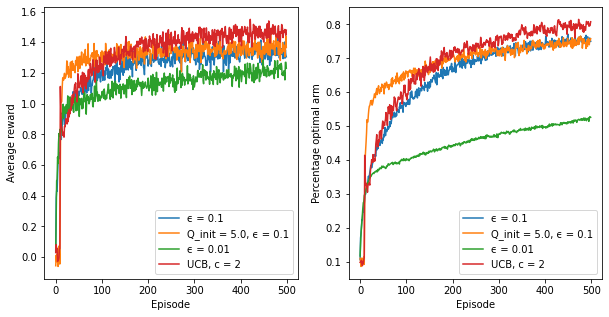

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(rew_1/n_rep, label = "ϵ = 0.1")
plt.plot(rew_optimistic/n_rep, label = "Q_init = 5.0, ϵ = 0.1")
plt.plot(rew_2/n_rep, label = "ϵ = 0.01")
plt.plot(rew_UCB/n_rep, label = "UCB, c = 2")
plt.ylabel("Average reward")
plt.xlabel("Episode")
plt.legend();

plt.subplot(1,2,2)
plt.plot(pct_best_1/n_rep, label = "ϵ = 0.1")
plt.plot(pct_best_optimistic/n_rep, label = "Q_init = 5.0, ϵ = 0.1")
plt.plot(pct_best_2/n_rep, label = "ϵ = 0.01")
plt.plot(pct_best_UCB/n_rep, label = "UCB, c = 2")
plt.ylabel("Percentage optimal arm")
plt.xlabel("Episode")
plt.legend();